# <center> <img src="../labs/img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> **Procesamiento de Datos Masivos** </center>
---
### <center> **Primavera 2025** </center>
---
### <center> **Procesamiento de Datos en Redes Sociales** </center>

---

**Proyecto Final**

**Fecha**: 13 mayo 2025

**Nombre del Equipo**: Arriba Linux

**Integrantes del Equipo**: Tirzah Peniche Barba / Ana Cristina Luna Arellano / Juan Pedro Bihouet

**Profesor**: Dr. Pablo Camarillo Ramirez


**INTRODUCCIÓN Y DEFINICIÓN DEL PROBLEMA**

En la actualidad, las redes sociales se han consolidado como una fuente inagotable de datos generados en tiempo real por millones de usuarios en todo el mundo. Plataformas como Twitter e Instagram concentran interacciones constantes que reflejan opiniones, emociones, tendencias de consumo, comportamientos sociales y eventos relevantes en tiempo real. Aprovechar este flujo de información puede representar una ventaja estratégica para diversos sectores, como el marketing, la investigación social, la gestión de crisis, o incluso la predicción de fenómenos colectivos.

El objetivo de este proyecto es desarrollar una solución de análisis en tiempo real de datos provenientes de redes sociales, utilizando tecnologías de procesamiento distribuido como Apache Kafka y Apache Spark. La aplicación simula un entorno donde se generan y transmiten publicaciones de redes sociales de manera continua, con el fin de analizarlas en tiempo real para extraer métricas de interés, como usuarios más activos, mensajes más populares, tendencias por frecuencia de palabras y patrones de interacción.

El problema que se busca abordar es cómo gestionar, procesar y extraer valor de grandes volúmenes de datos no estructurados y en constante flujo. Las empresas y organizaciones frecuentemente enfrentan el reto de recibir información en tiempo real, pero carecen de mecanismos eficientes para procesarla sin demoras, asegurando al mismo tiempo la veracidad de los datos y obteniendo resultados útiles y accionables.

Para abordar este reto, se ha diseñado una arquitectura basada en el ecosistema Big Data que permite el procesamiento en tiempo real (streaming), el manejo de grandes volumenes de información (escalabilidad), la integración de fuentes de datos diversas (variedad). La solución se contruye a partir de productores que simulan publicaciones de Twitter e Instagram, enviadas mediante Kafka a distintos tópicos. Spark Structured Streaming actúa como el motor de procesamiento que consume, transforma y analiza estos flujos, permitiendo realizar cálculos y visualizaciones de manera inmediata.

Este proyecto busca demostrar cómo una arquitectura moderna de Big Data puede ser implementada para enfrentar los desafíos de las 5Vs del Big Data: Volumen, Velocidad, Veracidad y Valor. A través de este desarrollo, se pretende no solo evidenciar el funcionamiento técnico del sistema, sino también mostrar el valor práctica de contar con herramientas de análisis en tiempo real en un mundo cada vez más impulsado por los datos.

**ARQUITECTURA DEL SISTEMA**

La arquitectura de la aplicación incluye:

1.- Productores Kafka: emiten mensajes JSON simulando publicaciones en redes sociales con campos como likes, timestamp y text.

2.- Kafka Cluster: gestiona los tópicos de entrada.

3.- PySpark Structured Streaming: actúa como consumidor y transforma los datos, generando columnas como features, label, prediction, probability.

4.- Modelo de clasificación: entrena un modelo para distinguir publicaciones virales (label = 1) de no virales (label = 0).

5.- Exportación y Power BI: los resultados se almacenan como CSV y se visualizan en un dashboard interactivo.

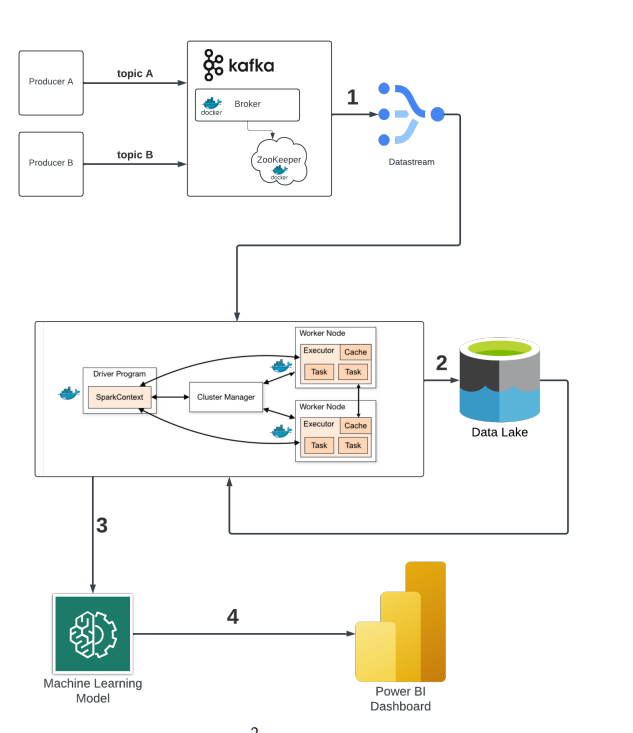

**5V JUSTIFICACIÓN**

##### Volumen
El sistema está diseñado para manejar un alto volumen de publicaciones simuladas en redes sociales, generadas continuamente por productores Kafka que imitan plataformas como Twitter e Instagram. Cada productor emite registros en formato JSON que incluyen campos como número de likes, timestamp, y texto del post.

La siguiente tabla resume el crecimiento estimado de datos durante las pruebas:
| Período de tiempo | Datos procesados |
| ----------------- | ---------------- |
| 1 segundo         | 6 KB             |
| 1 minuto          | 360 KB           |
| 1 hora            | 21 MB            |
| 1 día             | 504 MB           |

La combinación de dos productores transmitiendo en tiempo real permite escalar fácilmente a volúmenes significativos en horas de ejecución.

##### Velocidad
Los datos se generan y procesan en tiempo real mediante Apache Kafka y Spark Structured Streaming. Kafka garantiza una entrega rápida y ordenada de mensajes, mientras que Spark permite el procesamiento inmediato y almacenamiento en formato Parquet para análisis posteriores.

Utilizando el componente QueryListener de PySpark, se registró una tasa promedio de procesamiento de 11.8 filas por segundo, lo cual confirma la capacidad del sistema para entregar métricas en tiempo real.



##### Variedad
El sistema trabaja con datos generados desde distintas plataformas simuladas, todos unificados bajo un esquema común:

Esquema de Publicaciones

    - id (string)

    - timestamp (string)

    - likes (int)

    - text (string)

    - features (float)

    - prediction (int)

    - probability (array<float>)

    - viral (entero)

Esta diversidad de atributos permite al modelo de ML analizar tanto señales cuantitativas (likes, features) como cualitativas (probabilidad), mejorando su capacidad predictiva y de interpretación.

##### Veracidad
Para asegurar la confiabilidad de los datos:

- Kafka garantiza la entrega ordenada y persistente de mensajes.

- Spark valida la estructura de los JSON mediante esquemas definidos.

- Registros vacíos o malformados se descartan usando .dropna() en PySpark.

- El almacenamiento en Parquet asegura integridad estructural y eficiencia en el análisis posterior.



##### Valor
Los datos procesados se utilizan para entrenar un modelo de regresión logística que clasifica si una publicación tiene potencial de volverse viral. Los resultados se visualizan en Power BI, permitiendo:

- Monitorear precisión del modelo y confianza por publicación

- Detectar patrones en publicaciones virales

- Tomar decisiones en tiempo real para estrategias en redes sociales

Esto demuestra cómo datos crudos, en alto volumen, pueden transformarse en valor accionable mediante una arquitectura Big Data moderna y escalable.

**Tablero PowerBI**


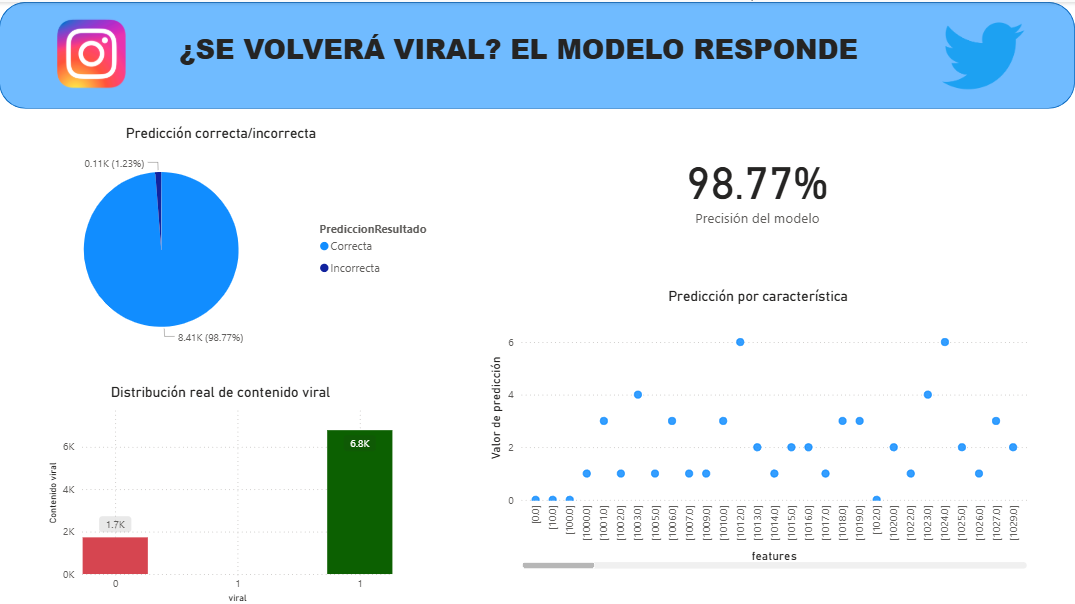

**Detalles de Implementación**

##### Tecnologías Utilizadas
Apache Kafka
Se utilizó Kafka como sistema de mensajería para simular la llegada continua de publicaciones de redes sociales. Cada productor envía mensajes JSON representando publicaciones con atributos como número de likes, timestamp y texto. Kafka permite desacoplar los productores de los consumidores, garantizando alto rendimiento, tolerancia a fallos y transmisión en tiempo real.

PySpark Structured Streaming
PySpark fue el motor de procesamiento en tiempo real. Se utilizó Structured Streaming para consumir los datos desde Kafka, convertirlos a un esquema estructurado, y aplicar transformaciones necesarias para preparar los datos para el modelo de clasificación. También permitió almacenar los datos como archivos Parquet para análisis posterior.

Parquet
Los datos transformados se almacenaron en formato Parquet, elegido por su estructura columnar y eficiencia de compresión. Esto optimiza el espacio en disco y permite consultas analíticas rápidas durante el entrenamiento del modelo y su evaluación.

Power BI
Power BI se utilizó como herramienta de visualización para construir un dashboard que permite analizar la precisión del modelo, la distribución de publicaciones virales, y visualizar la confianza de cada predicción.



##### Decisiones de Diseño
1.- Se implementaron dos productores Kafka: uno simula publicaciones de Twitter y otro de Instagram, para generar variedad en las fuentes.

2.- Se procesaron datos con atributos clave: features (derivado de likes), prediction, probability, y viral (valor real).

3.- Se utilizó regresión logística como modelo de clasificación, implementado con PySpark MLlib. Este modelo fue seleccionado por su capacidad para trabajar con datos binarios, su facilidad de interpretación y su buen desempeño en tareas de clasificación.

4.- Se creó una columna calculada PrediccionResultado para comparar el valor real con el predicho y facilitar la visualización de aciertos y errores.

5.- El resultado se exportó como .csv para ser cargado en Power BI y permitir una exploración visual e interactiva.

**Resultados y Evaluación**

Después de entrenar el modelo y procesar los resultados, se obtuvieron los siguientes indicadores clave:

- Precisión del modelo (Accuracy): 98.77%

- Total de publicaciones analizadas: 8,516

- Publicaciones correctamente clasificadas: 8,412

- Publicaciones clasificadas incorrectamente: 104

El análisis en Power BI incluyó las siguientes visualizaciones:

- Gráfico de pastel para mostrar la proporción de predicciones correctas vs. incorrectas.

- Indicador numérico de precisión global.

- Gráfico de barras con la distribución real de publicaciones virales (viral = 1) y no virales (viral = 0).

- Gráfico de dispersión que relaciona la variable features con las predicciones hechas por el modelo.

- Panel de confiabilidad con las probabilidades asociadas a cada predicción (probability), lo que permite evaluar la confianza del modelo en su decisión.



**Conclusión**

Como equipo, consideramos que este proyecto fue una experiencia integral que nos permitió aplicar de forma práctica los conocimientos adquiridos durante el curso de Datos Masivos. A través del diseño e implementación de una arquitectura basada en Kafka, PySpark Structured Streaming y Power BI, logramos construir un sistema capaz de procesar datos en tiempo real y aplicar un modelo de Machine Learning para predecir la viralidad de publicaciones en redes sociales.

Uno de los mayores aprendizajes fue entender cómo se integran los componentes del ecosistema Big Data en una solución funcional y escalable. Pudimos observar en tiempo real cómo fluye la información desde su generación hasta su análisis visual, y cómo cada decisión de diseño (formato, modelo, almacenamiento) impacta directamente en el rendimiento y claridad del análisis.

Uno de los principales problemas que se nos presentó fue la lectura de nuestros parquet files que ya, al tener que leer los logs de dos tópicos de Kafka distintos, no estaba generando una conexión adecuada con ninguno de los dos tópicos que se crearon. Para solucionar esto, modificamos el procesador de logs que kafka para que leyera todos los tópicos que tuvieran una terminación "*_logs.log" (que es como llamamos a nuestros tópicos de instagram y twitter) y con esto a Kafka le fue más sencillo procesar la información y pasarla a parquet files para su lectura.

Además, enfrentamos retos importantes como el manejo del esquema, la limpieza de datos, la transformación de columnas complejas como probability y la evaluación visual de los resultados. Estos desafíos nos permitieron fortalecer nuestra capacidad para trabajar en equipo, tomar decisiones técnicas en conjunto y mantener una comunicación efectiva a lo largo del desarrollo.

Creemos que este proyecto no solo refleja nuestra comprensión de los conceptos técnicos, sino también nuestra capacidad para resolver problemas reales con herramientas modernas. Al finalizar, nos sentimos satisfechos con el resultado y con la posibilidad de presentar una solución que combina análisis predictivo, visualización y escalabilidad.